<a href="https://colab.research.google.com/github/Parishri07/Youtube-toxic-comments-classification/blob/main/YouTube_toxic_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Youtube toxic comment/youtoxic_english_1000.csv')

In [4]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [7]:
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [8]:
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

Converting columns to numeric from boolean

In [9]:
column_names = df.columns.tolist()

def map_bool_to_numeric(col):
    if pd.api.types.is_bool_dtype(col):
        return col.replace({True: 1, False: 0})
    else:
        return col

df = df.apply(map_bool_to_numeric)

In [10]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
unique_values = set(df['Text'])

# Count the total number of elements
total_elements = len(df)

# Check if there are duplicates based on set vs. list length
if len(unique_values) != total_elements:
  print("There are duplicate values in the column.")
else:
  print("No duplicate values found.")

There are duplicate values in the column.


In [12]:
# Check for duplicate comments
duplicate_rows = df[df.duplicated(subset=['Text'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

Duplicate rows based on 'Text' column:
                      CommentId      VideoId           Text  IsToxic  \
592        UgiXm5jxvkdIxHgCoAEC  cT14IbTDW2c  RUN THEM OVER        1   
642  Ugxen2QgJYhNiRrMegR4AaABAg  cT14IbTDW2c  run them over        1   
657  UgxXtUmfp0rdwXB8qld4AaABAg  cT14IbTDW2c  run them over        1   
677  UgyjhPsMlWKlFNmG-h94AaABAg  cT14IbTDW2c  run them over        1   
699  UgzFZGnqcjZcW7wejI54AaABAg  cT14IbTDW2c  RUN THEM OVER        1   

     IsAbusive  IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
592          1         0              1          0             0         0   
642          1         1              0          0             0         0   
657          1         0              1          0             0         0   
677          1         0              1          0             0         0   
699          1         0              1          0             0         0   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate

In [13]:
# Drop duplicate comments
df.drop_duplicates(subset=['Text'], keep='first', inplace=True)

In [14]:
# Confirm duplicates are removed
print("Number of rows after removing duplicates:", len(df))

# Reindex the DataFrame after dropping duplicates
df.reset_index(drop=True, inplace=True)

Number of rows after removing duplicates: 997


In [15]:
duplicate_rows = df[df.duplicated(subset=['VideoId'], keep=False)]
print("Duplicate rows based on 'Text' column:")
print(duplicate_rows)

Duplicate rows based on 'Text' column:
                CommentId      VideoId  \
0    Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1    Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2    Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3    Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4    Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   
..                    ...          ...   
992  Ugi5ADt10EdDz3gCoAEC  XRuCW80L9mA   
993  Ugifh2DMhBbDkHgCoAEC  XRuCW80L9mA   
994  Ugj_plbGBjjzYXgCoAEC  XRuCW80L9mA   
995  Ugj0bah1De8xy3gCoAEC  XRuCW80L9mA   
996  UgjBJKQSoQMQ6ngCoAEC  XRuCW80L9mA   

                                                  Text  IsToxic  IsAbusive  \
0    If only people would just take a step back and...        0          0   
1    Law enforcement is not trained to shoot to app...        1          1   
2    \nDont you reckon them 'black lives matter' ba...        1          1   
3    There are a very large number of people who do...        0          0   
4    The Arab dude is absolutely right, he should h...        0   

In [16]:
df['VideoId'].unique()

array(['04kJtp6pVXI', '4rCweDxDqdw', '5vF4si3hoRA', '8HB18hZrhXc',
       '9pr1oE34bIM', 'bUgKZMSxr3E', 'cT14IbTDW2c', 'dDbRyFIkNII',
       'dG7mZQvaQDk', 'Dt9-byUhPdg', '#NAME?', 'TZxEyoplYbI',
       'XRuCW80L9mA'], dtype=object)

Plots

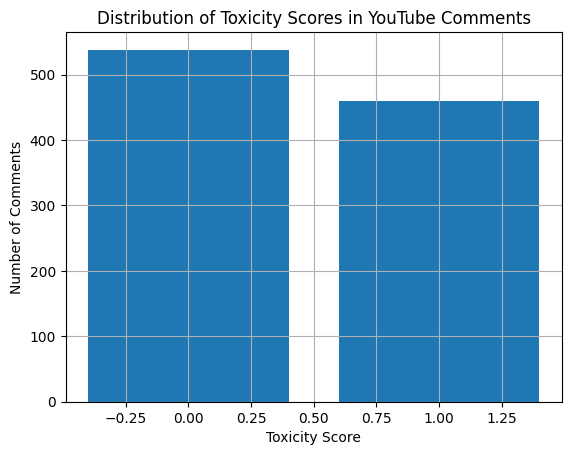

In [ ]:
toxicity = df['IsToxic'].value_counts()

plt.bar(toxicity.index, toxicity.values)
plt.xlabel('Toxicity Score')
plt.ylabel('Number of Comments')
plt.title('Distribution of Toxicity Scores in YouTube Comments')
plt.grid(True)
plt.show()

## plot showing the number of comments for each toxicity score

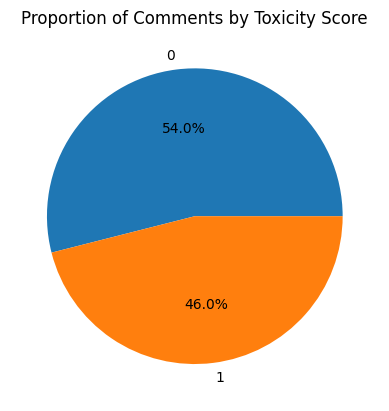

In [ ]:
plt.pie(toxicity.values, labels=toxicity.index, autopct='%1.1f%%')
plt.title('Proportion of Comments by Toxicity Score')
plt.show()

## 1-toxic and 0-non toxic

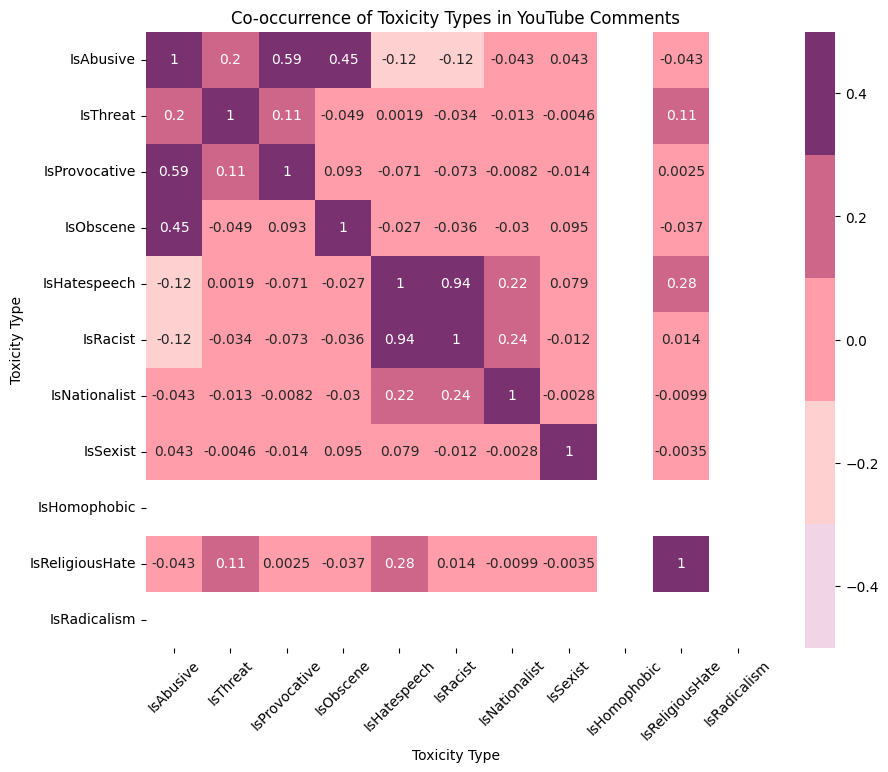

In [ ]:
from matplotlib.colors import ListedColormap

dark_set2 = ['#F1D4E5' ,'#FFD0D0' ,'#FF9EAA' ,'#CD6688', '#7A316F']
dark_cmap = ListedColormap(dark_set2)

norm = plt.Normalize(vmin=-0.5, vmax=0.5)

toxic_labels = ['IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech',
                'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']
toxicity_df = df[toxic_labels]

cooccurrence_matrix = toxicity_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cooccurrence_matrix, annot=True, cmap=dark_cmap, norm=norm)
plt.xlabel('Toxicity Type')
plt.ylabel('Toxicity Type')
plt.title('Co-occurrence of Toxicity Types in YouTube Comments')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## implies that comments categorised as 'hate speech' have 94% chances that it will categorised as 'racist'

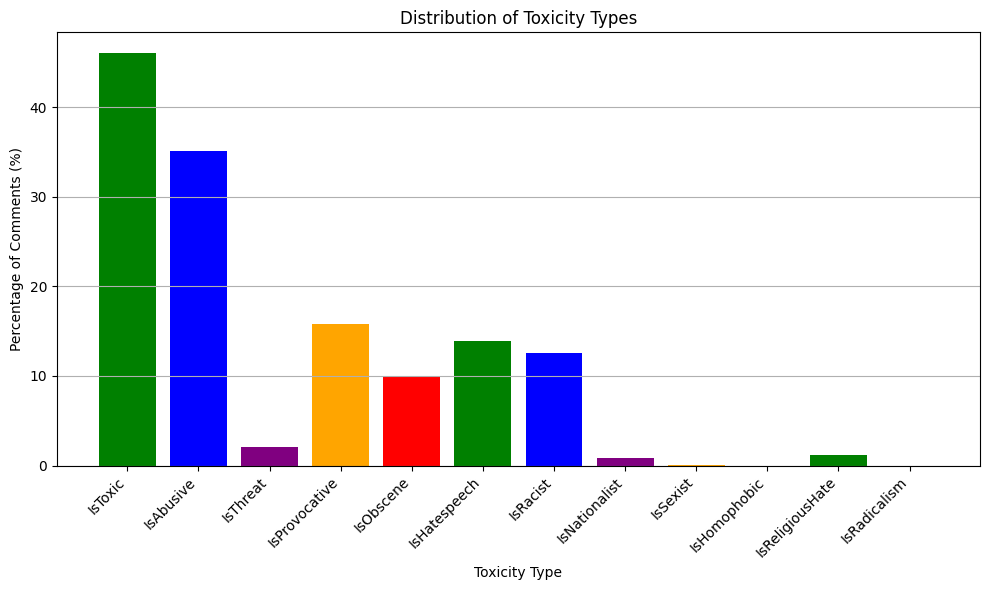

In [ ]:
import matplotlib.cm as cm

toxic_types = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
               'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
               'IsReligiousHate', 'IsRadicalism']

colors = ['green', 'blue', 'purple', 'orange', 'red']

n_comments = len(df)
percentages = []
for col in toxic_types:
  n_toxic = len(df[df[col] == 1])
  percentage = (n_toxic / n_comments) * 100
  percentages.append(percentage)

plt.figure(figsize=(10, 6))
plt.bar(toxic_types, percentages, color=colors)
plt.xlabel('Toxicity Type')
plt.ylabel('Percentage of Comments (%)')
plt.title('Distribution of Toxicity Types')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

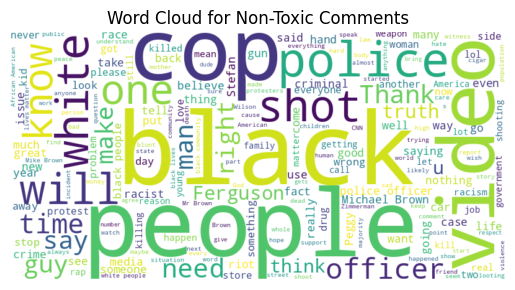

In [ ]:
from wordcloud import WordCloud

non_toxic_comments = ' '.join(df[~df['IsToxic']]['Text'])
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

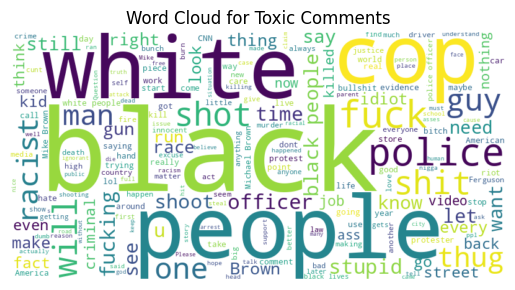

In [ ]:
toxic_comments = ' '.join(df[df['IsToxic']]['Text'])
wordcloud_toxic = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

Data Preprocessing

Removing stop words

In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = text.lower().split()  # Tokenize and lowercase
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

df['Text'] = df['Text'].apply(remove_stopwords)  # Apply the function to each sentence

Removing numbers

In [21]:
pattern = r"\d+"
df.loc[:,'Text'] = df.loc[:,'Text'].str.replace(pattern, '', regex=True)
df['Text']

0      people would take step back make case them, an...
1      law enforcement trained shoot apprehend. train...
2      dont reckon 'black lives matter' banners held ...
3      large number people like police officers. call...
4      arab dude absolutely right, shot  extra time. ...
                             ...                        
992                       remember sent national defence
993    stats don`t represent problem. race baiting at...
994              quote mother... wow hit hard. accurate.
995                                         video racist
996                         god, narrator annoying lisp.
Name: Text, Length: 997, dtype: object

Removing special characters

In [22]:
df.loc[:,'Text'] = df.loc[:,'Text'].str.replace(r"[^\w\s]", '', regex=True)
df.loc[:,'Text'] = df.loc[:,'Text'].str.strip()

df['Text']

0      people would take step back make case them any...
1      law enforcement trained shoot apprehend traine...
2      dont reckon black lives matter banners held wh...
3      large number people like police officers calle...
4      arab dude absolutely right shot  extra time sh...
                             ...                        
992                       remember sent national defence
993    stats dont represent problem race baiting atti...
994                   quote mother wow hit hard accurate
995                                         video racist
996                           god narrator annoying lisp
Name: Text, Length: 997, dtype: object

Removing abbreviations

In [25]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')

    return text

In [26]:
df['Text'] = df['Text'].map(lambda com : clean_text(com))

In [27]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,people would take step back make case them any...,0,0,0,0,0,0,0,0,0,0,0,0
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,law enforcement trained shoot apprehend traine...,1,1,0,0,0,0,0,0,0,0,0,0
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,dont reckon black lives matter banners held wh...,1,1,0,0,1,0,0,0,0,0,0,0
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,large number people like police officers calle...,0,0,0,0,0,0,0,0,0,0,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,arab dude absolutely right shot extra time sho...,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=5000, stop_words='english')
X = vect.fit_transform(df['Text'])
y = df['IsToxic']

## tranforming text features to pass it to the model

The dataset is unbalanced. There are multiple comments on a few videos.

SMOTE (Synthetic Minority Over-Sampling Technique): Creates synthetic samples for the minority class to balance the class distribution.

Edited Nearest Neighbors (ENN): Removes noisy or misclassified data points from both the majority and minority classes.

In [29]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [30]:
X_resampled

<79x4385 sparse matrix of type '<class 'numpy.float64'>'
	with 440 stored elements in Compressed Sparse Row format>

In [31]:
y_resampled

0     0
1     0
2     0
3     0
4     0
     ..
74    1
75    1
76    1
77    1
78    1
Name: IsToxic, Length: 79, dtype: int64

In [32]:
# Convert the oversampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled.todense(), columns=vect.get_feature_names_out())
df_resampled['Toxic'] = y_resampled

# Check the distribution after oversampling
toxic_distribution_after = df_resampled['Toxic'].value_counts()
print("\nDistribution after SMOTE:")
print(toxic_distribution_after)


Distribution after SMOTE:
Toxic
0    61
1    18
Name: count, dtype: int64


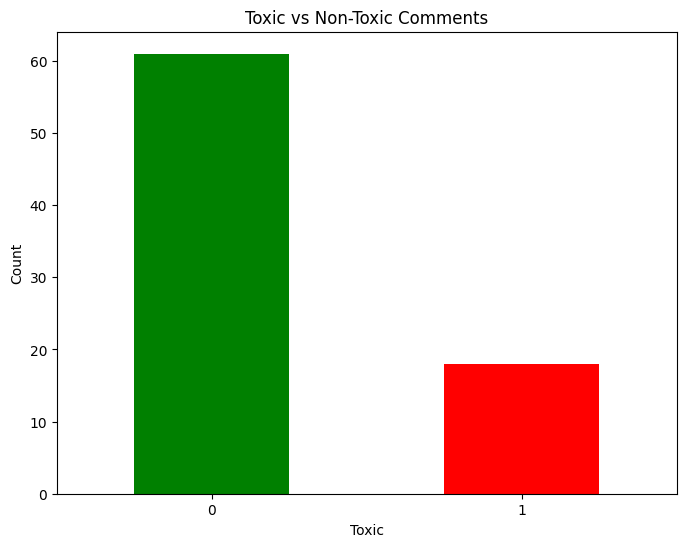

In [33]:
# Bar plot for toxic vs non-toxic comments
plt.figure(figsize=(8, 6))
toxic_counts = df_resampled['Toxic'].value_counts()
toxic_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [35]:
X_train

<63x4385 sparse matrix of type '<class 'numpy.float64'>'
	with 345 stored elements in Compressed Sparse Row format>

**Neural networks**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [53]:
max_features = 10000

embedding_dim = 128

max_len = 200

lstm_units = 64

In [54]:
model = Sequential()

# Embedding layer (convert tokens to vectors)
model.add(Embedding(max_features, embedding_dim, input_length=max_len))

# LSTM layer (capture sequential information)
model.add(LSTM(units=lstm_units))

# Dense layer (classification)
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"], run_eagerly=True)

In [55]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert to dense array and ensure float32 data type
X_train_dense = X_train.toarray().astype('float32')
X_train_padded = pad_sequences(X_train_dense, maxlen=max_len)

print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of y_train:", y_train.shape)

# Check if data is empty
print("Number of samples in X_train_padded:", X_train_padded.shape[0])
print("Number of samples in y_train:", y_train.shape[0])

result = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)
result

Shape of X_train_padded: (63, 200)
Shape of y_train: (63,)
Number of samples in X_train_padded: 63
Number of samples in y_train: 63
Epoch 1/5
2/2 [==============================] - 3s 1s/step - loss: 0.6699 - accuracy: 0.7400 - val_loss: 0.6212 - val_accuracy: 0.8462
Epoch 2/5
2/2 [==============================] - 2s 1s/step - loss: 0.6399 - accuracy: 0.7400 - val_loss: 0.5662 - val_accuracy: 0.8462
Epoch 3/5
2/2 [==============================] - 2s 1s/step - loss: 0.6075 - accuracy: 0.7400 - val_loss: 0.5042 - val_accuracy: 0.8462
Epoch 4/5
2/2 [==============================] - 2s 1s/step - loss: 0.5808 - accuracy: 0.7400 - val_loss: 0.4475 - val_accuracy: 0.8462
Epoch 5/5
2/2 [==============================] - 3s 2s/step - loss: 0.5894 - accuracy: 0.7400 - val_loss: 0.4334 - val_accuracy: 0.8462


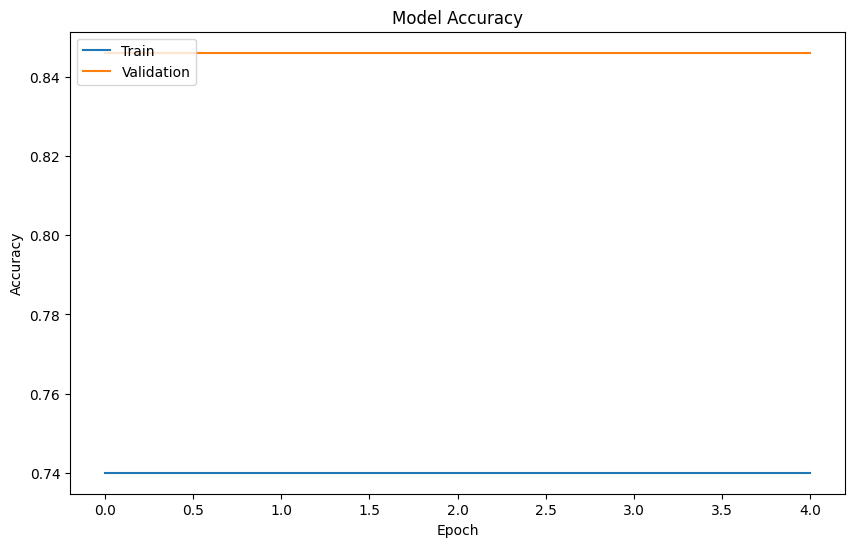

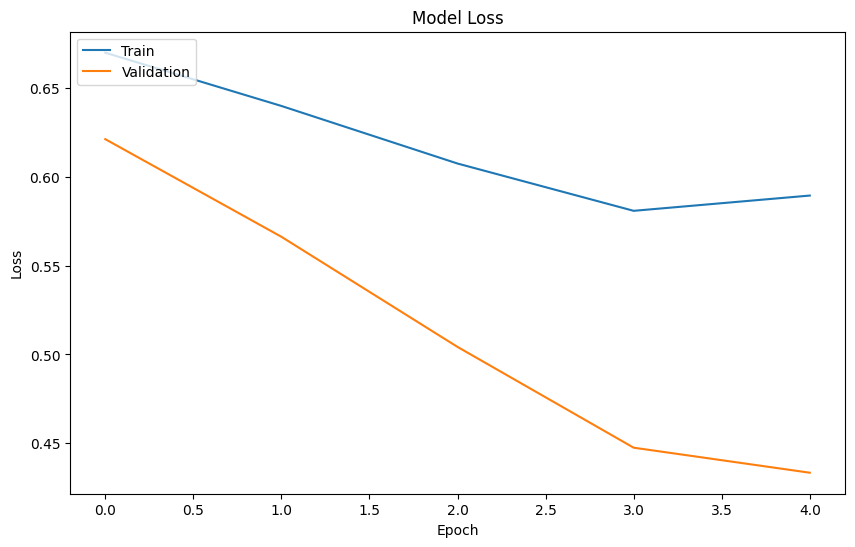

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [57]:
if hasattr(X_test, 'toarray'):
    X_test_dense = X_test.toarray().astype('float32')
    X_test_padded = pad_sequences(X_test_dense, maxlen=max_len)
else:
    X_test_padded = X_test

loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 311ms/step - loss: 0.4826 - accuracy: 0.8125
Test Accuracy: 0.8125


In [58]:
y_pred_proba = model.predict(X_test_padded)
y_pred = (y_pred_proba > 0.5).astype(int)

1/1 [==============================] - 0s 305ms/step


In [59]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.00      0.00      0.00         3

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


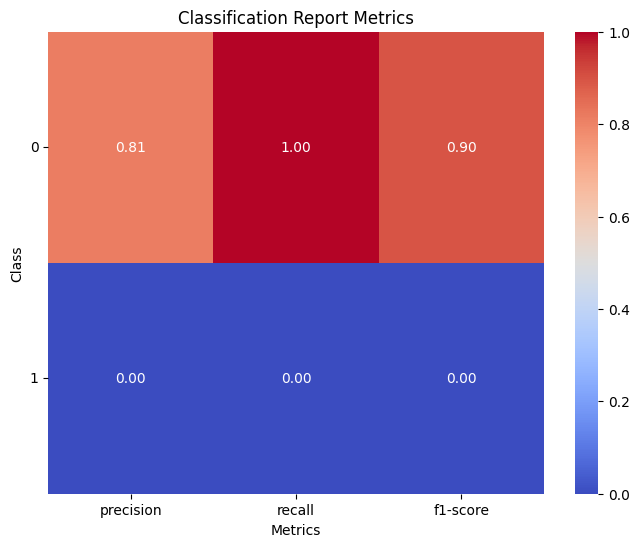

In [60]:
report = classification_report(y_test, y_pred,  output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Extract relevant metrics for visualization
class_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotting the classification report metrics using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.yticks(rotation=0)
plt.show()

**Support Vector machine algorithm**

In [40]:
from sklearn.svm import LinearSVC

model =  LinearSVC()

In [43]:
model.fit(X_train, y_train)

LinearSVC()

In [47]:
predictions = model.predict(X_test)

In [48]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy on Test Set:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy on Test Set: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


If reviews exhibit complex sentiment patterns, SVM with a non-linear kernel might be better suited to capture these nuances.